In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
import pandas as pdrestar
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
#from sklearn_extra.cluster import KMedoids
#from sklearn_extra.kernel_methods import EigenProRegressor

In [3]:
# If you saved as CSV:
df = pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\processed_ABCDEats_data.csv")

# Or if you saved as pickle:
#df = pd.read_pickle('processed_ABCDEats_data.pkl')

df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")

C:\Users\sacar\AppData\Local\Temp\ipykernel_22184\2944022070.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  int64  
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  int64  
 11  CUI_Asian                 31737 non-null  int64  
 12  CUI_Beverages             31737 non-null  int64  
 13  CUI_Cafe                  31737 non-null  int64  
 14  CUI_Ch

In [31]:
#Select numeric data types
df_numeric = df.select_dtypes(include=[np.number])

In [34]:
# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df_numeric.filter(like='HR_').columns.tolist() + \
                  df_numeric.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_new = df_numeric.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_new

Columns to be dropped: ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,weekend_orders,underweekend_orders,weekend_ratio,lunch_orders,dinner_orders,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
0,18,2,5,1,0,1,0,0,0,0,...,2,0,1.0,0,2,0,0,2,0,0
1,17,2,2,2,0,1,12,6,0,0,...,2,0,1.0,1,0,1,1,0,0,0
2,38,1,2,2,0,1,9,0,0,0,...,2,0,1.0,1,0,1,1,0,0,0
3,24,2,3,1,0,2,0,13,0,0,...,1,1,0.5,1,0,0,2,0,0,0
4,20,2,5,0,0,2,14,40,0,0,...,1,1,0.5,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,30,1,1,1,34,0,0,0,18,0,...,1,0,1.0,1,0,0,1,0,0,0
31733,27,1,1,0,28,0,18,0,0,0,...,1,0,1.0,0,0,0,0,1,0,0
31734,24,1,1,1,12,0,0,0,0,0,...,1,0,1.0,0,0,0,0,0,0,1
31735,34,1,1,0,7,0,0,12,0,0,...,1,0,1.0,1,0,0,1,0,0,0


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31737 non-null  int64  
 1   vendor_count              31737 non-null  int64  
 2   product_count             31737 non-null  int64  
 3   is_chain                  31737 non-null  int64  
 4   first_order               31737 non-null  int64  
 5   last_order                31737 non-null  int64  
 6   CUI_American              31737 non-null  int64  
 7   CUI_Asian                 31737 non-null  int64  
 8   CUI_Beverages             31737 non-null  int64  
 9   CUI_Cafe                  31737 non-null  int64  
 10  CUI_Chicken Dishes        31737 non-null  int64  
 11  CUI_Chinese               31737 non-null  int64  
 12  CUI_Desserts              31737 non-null  int64  
 13  CUI_Healthy               31737 non-null  int64  
 14  CUI_In

In [37]:

#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()

#Scale the original numeric features
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


#Scale the processed numeric features
df_scaled_new = scaler.fit_transform(df_new)

# Convert the scaled array back to a DataFrame
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_new.columns, index=df_new.index)

In [41]:
df_scaled_new.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,weekend_orders,underweekend_orders,weekend_ratio,lunch_orders,dinner_orders,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
0,-1.338044,-0.402940,-0.099538,-0.459198,-1.181245,-2.707106,-0.410078,-0.418056,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,-0.517547,0.757104,-0.463208,-0.615700,0.204674,-0.276604,-0.362107
1,-1.478899,-0.402940,-0.530395,-0.208168,-1.181245,-2.707106,0.630296,-0.162487,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,0.037177,-0.434062,0.084697,-0.184514,-0.582069,-0.276604,-0.362107
2,1.479045,-0.763931,-0.530395,-0.208168,-1.181245,-2.707106,0.370202,-0.418056,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,0.037177,-0.434062,0.084697,-0.184514,-0.582069,-0.276604,-0.362107
3,-0.492917,-0.402940,-0.386776,-0.459198,-1.181245,-2.663969,-0.410078,0.135676,-0.265138,-0.12277,...,-0.149654,-0.562671,0.672111,0.037177,-0.434062,-0.463208,0.246671,-0.582069,-0.276604,-0.362107
4,-1.056335,-0.402940,-0.099538,-0.710229,-1.181245,-2.663969,0.803692,1.285734,-0.265138,-0.12277,...,-0.149654,-0.562671,0.672111,-0.517547,-0.434062,0.632602,-0.615700,-0.582069,-0.276604,-0.362107


In [39]:

time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders']]

In [45]:
#K-means with numeric features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(time_of_order_features)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

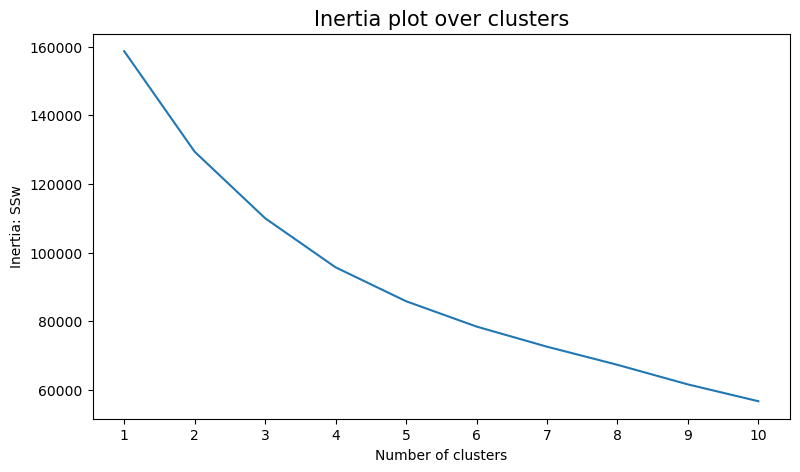

In [ ]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.6139707012685283
For n_clusters = 3, the average silhouette_score is : 0.4798580920969515
For n_clusters = 4, the average silhouette_score is : 0.545345022050105
For n_clusters = 5, the average silhouette_score is : 0.4917323614963601
For n_clusters = 6, the average silhouette_score is : 0.39977848020513695
For n_clusters = 7, the average silhouette_score is : 0.4326193513699986
For n_clusters = 8, the average silhouette_score is : 0.39133092690018717
For n_clusters = 9, the average silhouette_score is : 0.40770714479350917
For n_clusters = 10, the average silhouette_score is : 0.34727712785013765


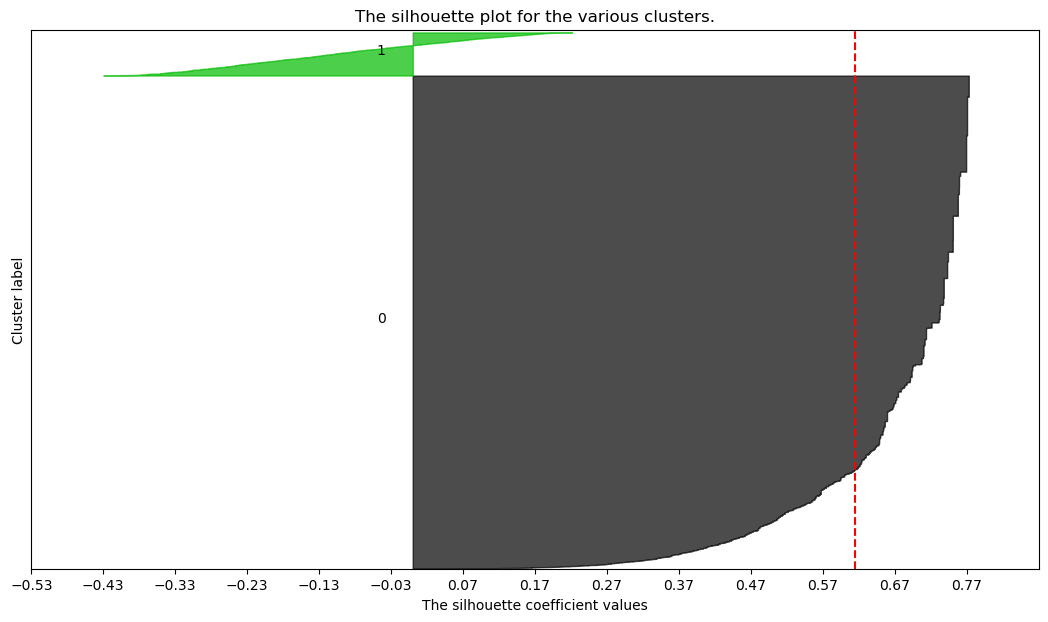

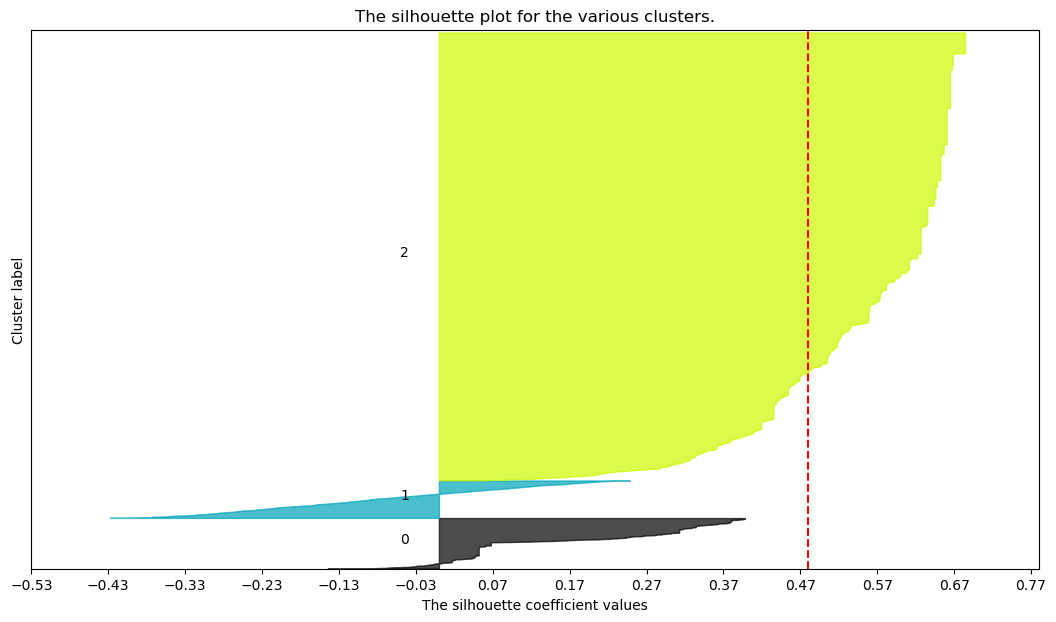

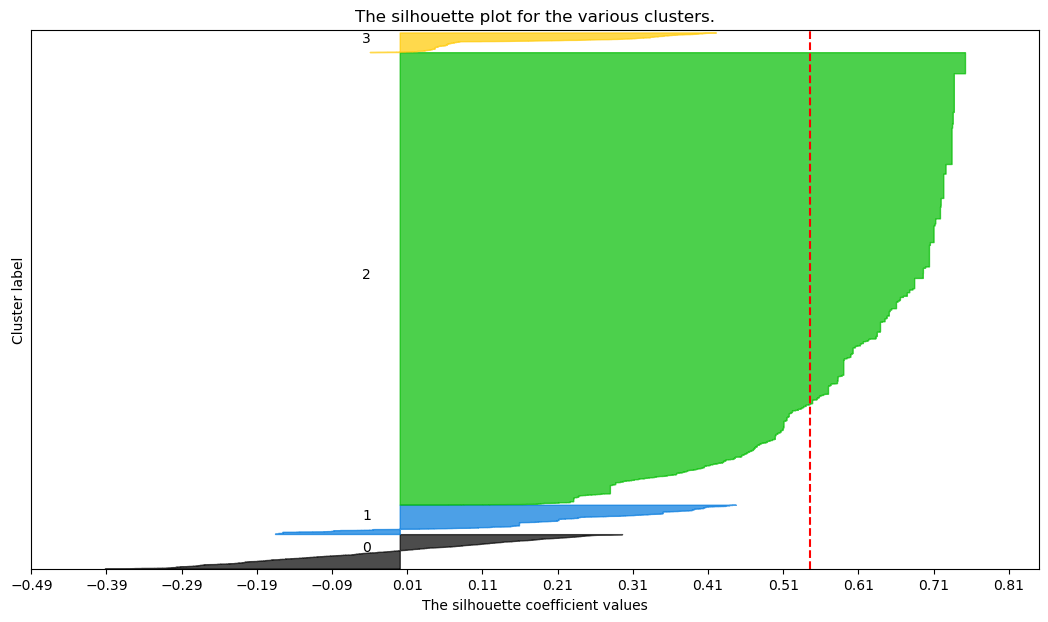

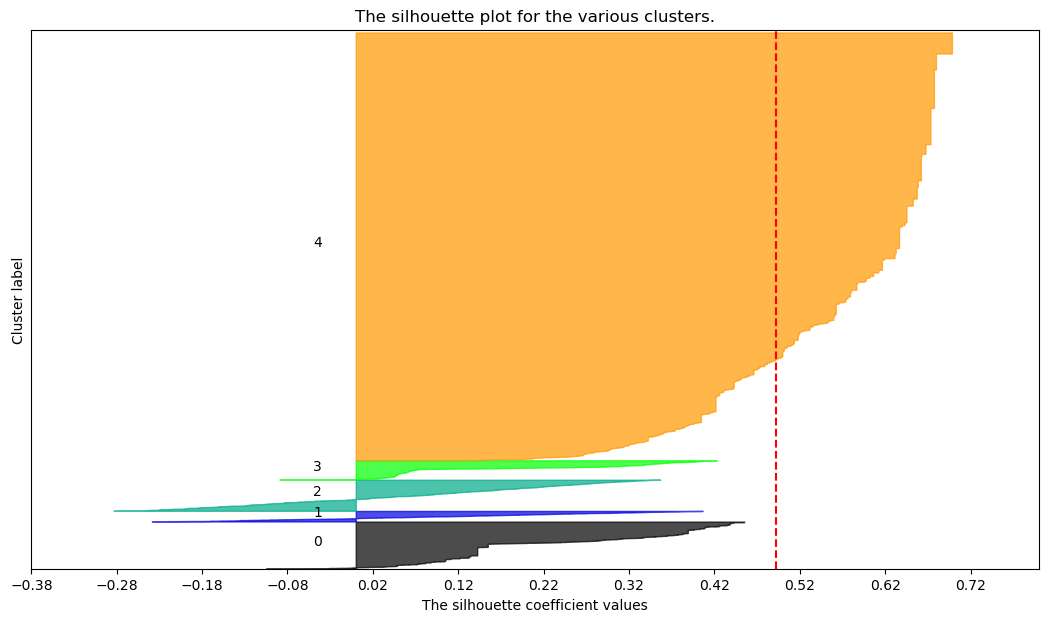

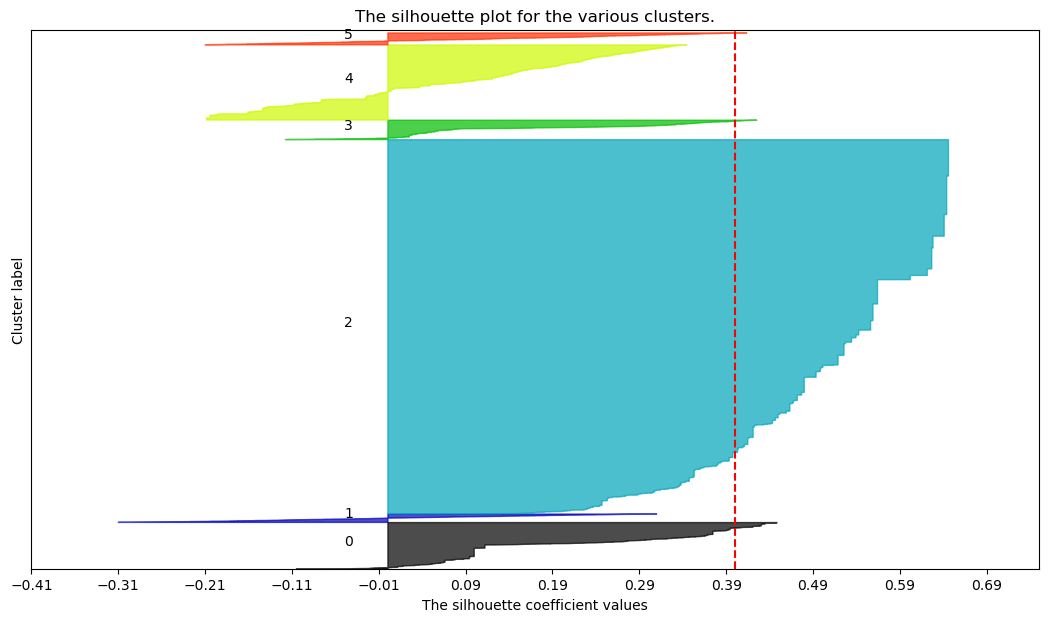

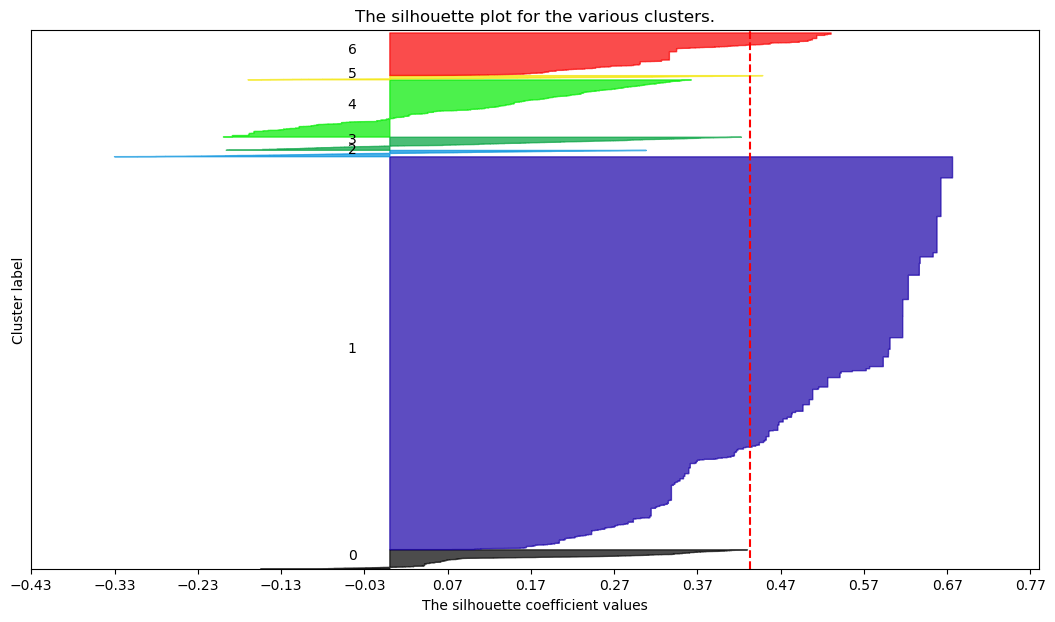

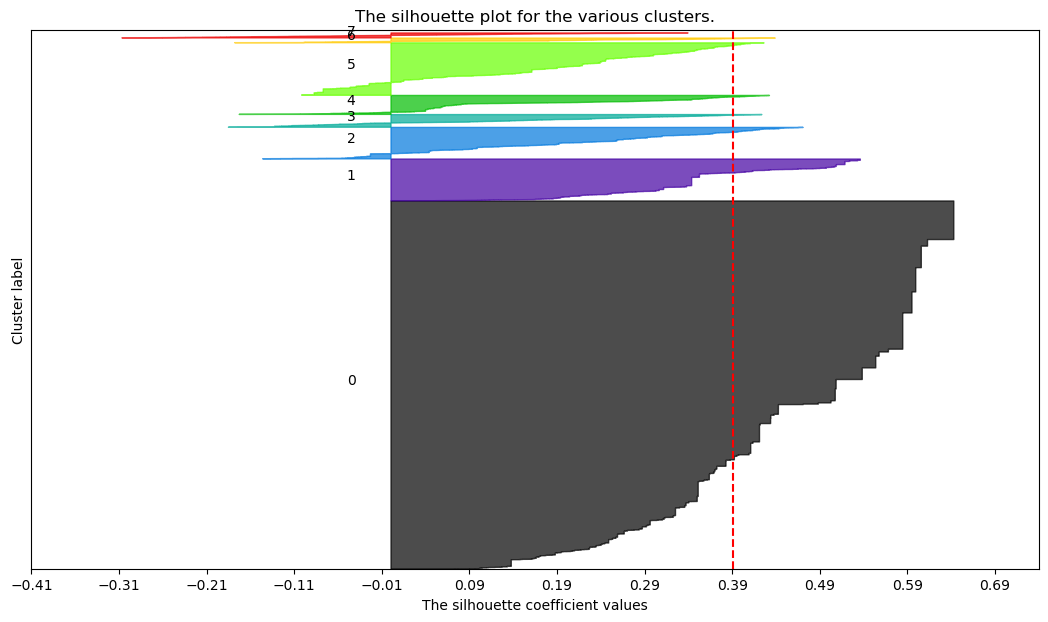

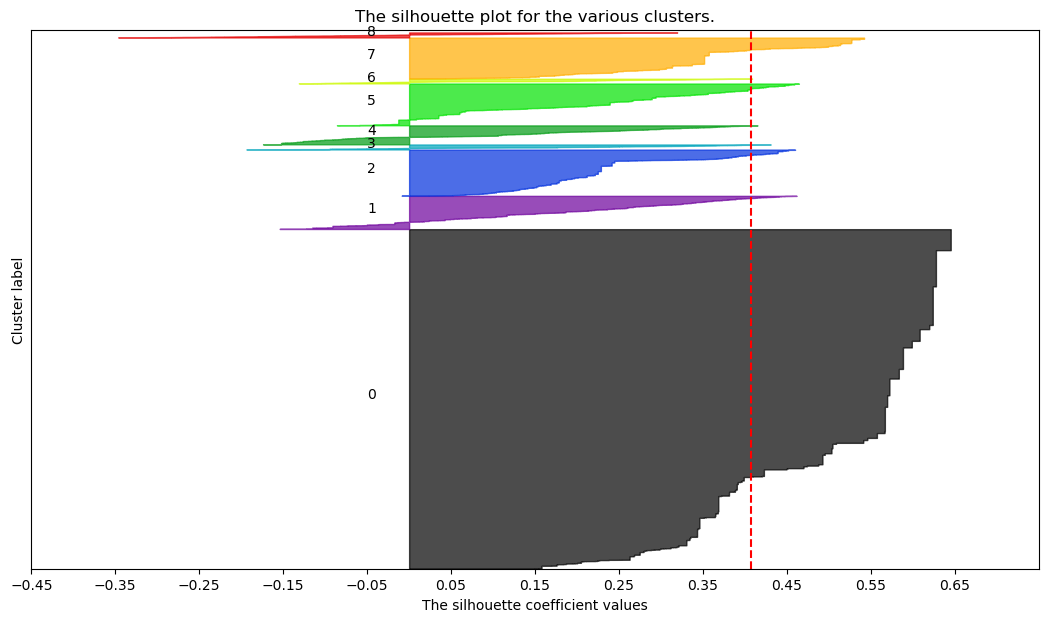

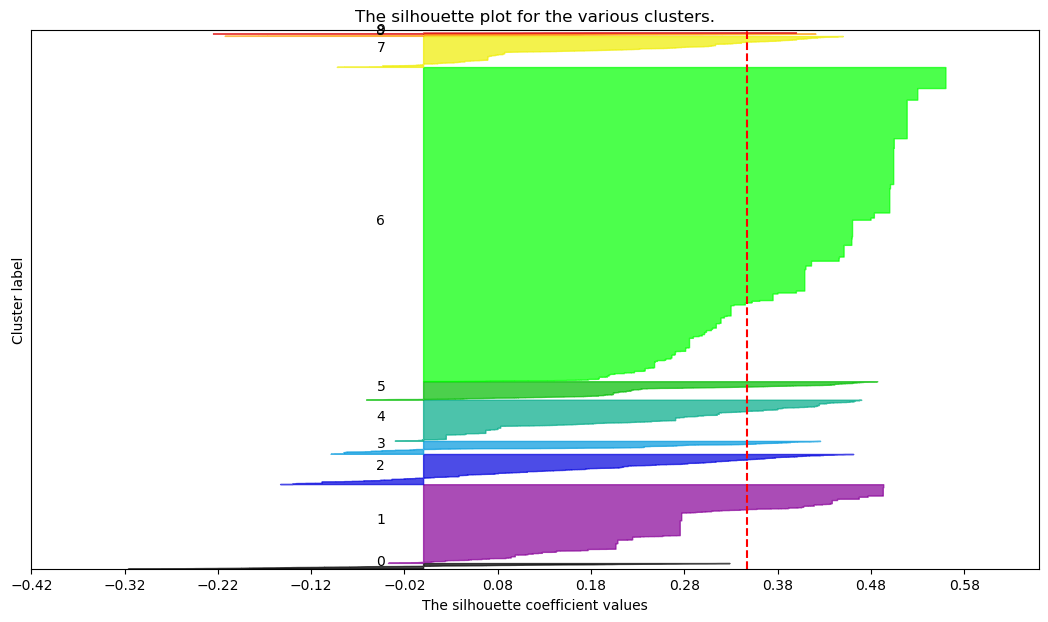

In [47]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(time_of_order_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(time_of_order_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(time_of_order_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [48]:
#K-means with K=2 for time of day columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
labels,,,,,
0,-0.114482,-0.179566,-0.168307,-0.082930,-0.007075
1,1.311462,2.057042,1.928068,0.950017,0.081051


In [49]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
labels,,,,,
0,1.301696,2.316109,2.219957,0.090616,-0.272623
1,0.693304,-0.154906,-0.513519,0.003491,3.110265
2,-0.141505,-0.171163,-0.148221,-0.169152,-0.186247
3,-0.054049,0.115199,0.289718,3.740848,0.136044
